In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import acf, pacf
import math
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [2]:
df = pd.read_csv("infynew.csv")

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,24-06-2019,751.900024,751.900024,742.650024,745.5,703.546448,4758178
1,25-06-2019,744,750.900024,737.299988,748.099976,706.000122,3677911
2,26-06-2019,743,751.450012,738,739.200012,697.601013,5447130
3,27-06-2019,742,744.700012,728.150024,730.549988,689.437805,11122346
4,28-06-2019,735.5,739.5,728.5,732,690.806213,5919494
...,...,...,...,...,...,...,...
491,17-06-2021,1475.099976,1502.650024,1475.099976,1495.300049,1495.300049,7677951
492,18-06-2021,1509,1515.800049,1487.400024,1503.300049,1503.300049,13533974
493,21-06-2021,1493,1505.800049,1484.199951,1500.300049,1500.300049,5454052
494,22-06-2021,1509.699951,1521.449951,1502.099976,1511.849976,1511.849976,6427862


In [4]:
del df['Open']
del df['High']
del df['Low']
del df['Adj Close']
del df['Volume']

In [5]:
df

,Date,Close
0,24-06-2019,745.5
1,25-06-2019,748.099976
2,26-06-2019,739.200012
3,27-06-2019,730.549988
4,28-06-2019,732
...,...,...
491,17-06-2021,1495.300049
492,18-06-2021,1503.300049
493,21-06-2021,1500.300049
494,22-06-2021,1511.849976


In [6]:
df['Close'].isnull().any()

False

In [7]:
for i in df.columns[1:]:
    df[i] = df[i].apply(pd.to_numeric, errors='coerce').fillna(0.0)

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df

,Date,Close
0,2019-06-24,745.500000
1,2019-06-25,748.099976
2,2019-06-26,739.200012
3,2019-06-27,730.549988
4,2019-06-28,732.000000
...,...,...
491,2021-06-17,1495.300049
492,2021-06-18,1503.300049
493,2021-06-21,1500.300049
494,2021-06-22,1511.849976


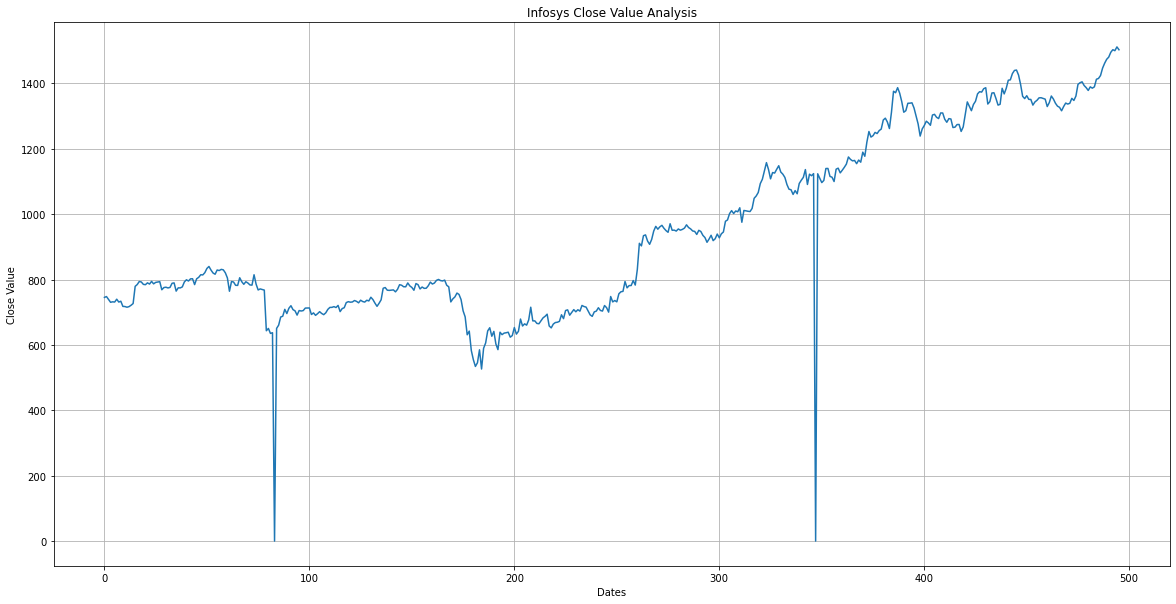

In [10]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Value')
plt.plot(df['Close'])
# df1['Close'].plot()
plt.title('Infosys Close Value Analysis')
plt.show()

In [11]:
df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [12]:
#Determine rolling statistics
rolmean = df['Close'].rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = df['Close'].rolling(window=12).std()
print(rolmean,rolstd)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
491    1429.554189
492    1439.941691
493    1449.162526
494    1459.679189
495    1469.137522
Name: Close, Length: 496, dtype: float64 0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
491    40.949413
492    42.637813
493    42.737474
494    41.187028
495    36.397044
Name: Close, Length: 496, dtype: float64


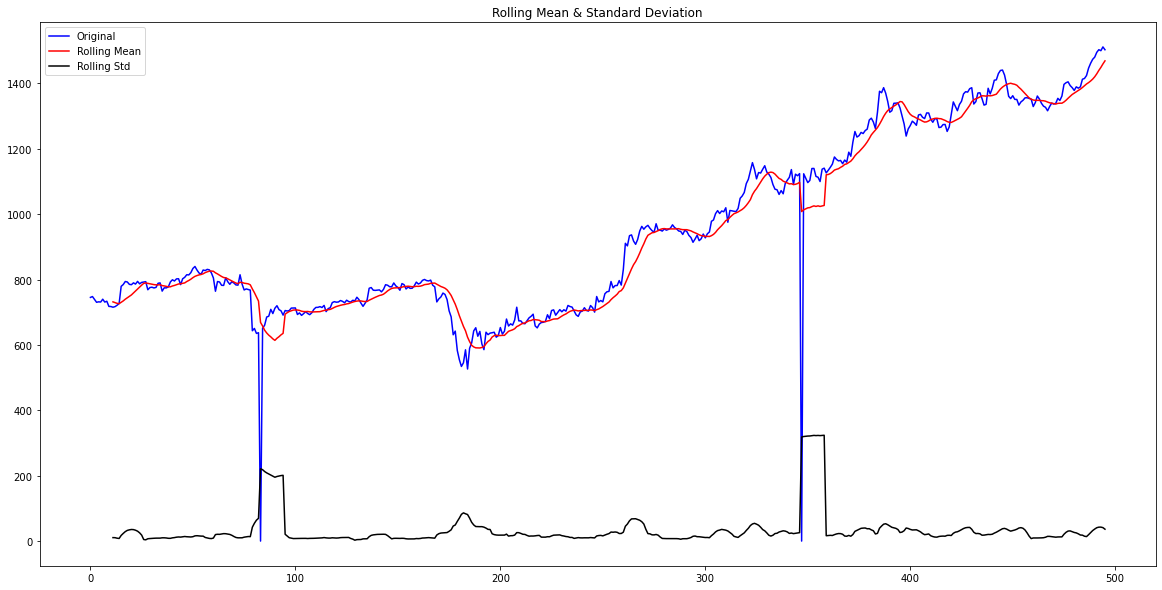

In [13]:
orig = plt.plot(df['Close'], color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [14]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df['Close'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                   0.177582
p-value                          0.970976
#Lags Used                       8.000000
Number of Observations Used    487.000000
Critical Value (1%)             -3.443849
Critical Value (5%)             -2.867493
Critical Value (10%)            -2.569941
dtype: float64


In [15]:
df1 = df.copy()

In [16]:
df

,Date,Close
0,2019-06-24,745.500000
1,2019-06-25,748.099976
2,2019-06-26,739.200012
3,2019-06-27,730.549988
4,2019-06-28,732.000000
...,...,...
491,2021-06-17,1495.300049
492,2021-06-18,1503.300049
493,2021-06-21,1500.300049
494,2021-06-22,1511.849976


In [17]:
del df1['Date']

## LogScale

Text(0.5, 1.0, 'Logscale')

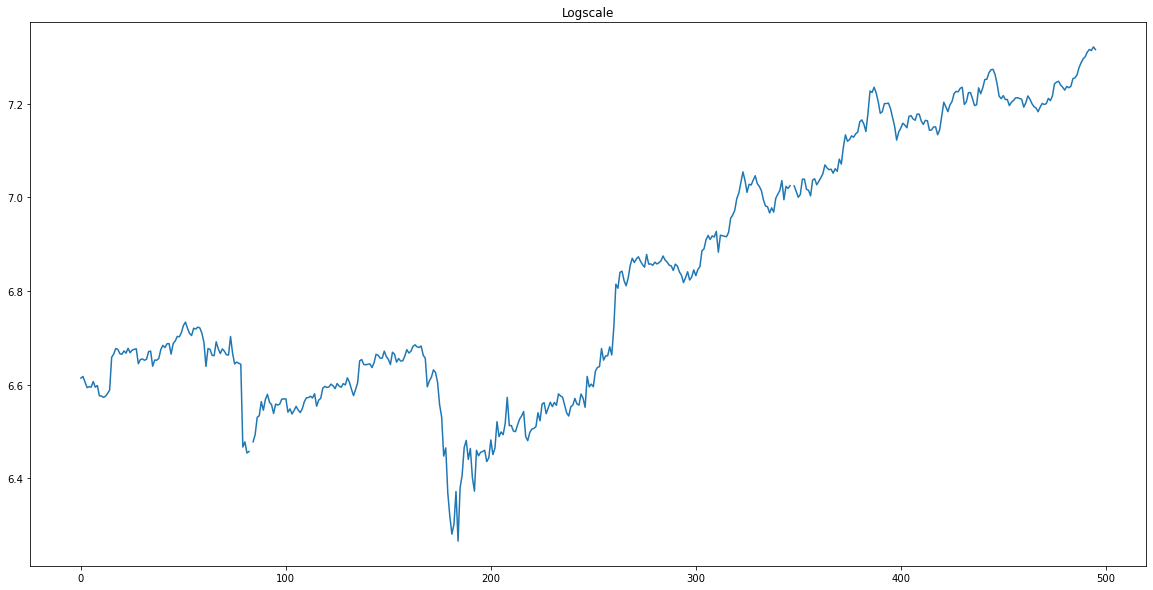

In [18]:
df_logScale = np.log(df['Close'])
plt.plot(df_logScale)
plt.title("Logscale")

In [19]:
df_logScale

0      6.614055
1      6.617537
2      6.605569
3      6.593798
4      6.595781
         ...   
491    7.310082
492    7.315418
493    7.313420
494    7.321089
495    7.315318
Name: Close, Length: 496, dtype: float64

In [20]:
df_logScale = pd.DataFrame(df_logScale, columns=df1.columns, index=df1.index)

In [21]:
# df_logScale

In [22]:
# df_logScale.describe()

In [23]:
# df['Close'].describe()

In [24]:
def cleaning_data(test):
    test.replace([np.inf, -np.inf], np.nan, inplace=True)
    test.dropna(how="any", inplace=True)
    test = test.fillna("", inplace=False)
    return test

In [25]:
cleaning_data(df_logScale)

,Close
0,6.614055
1,6.617537
2,6.605569
3,6.593798
4,6.595781
...,...
491,7.310082
492,7.315418
493,7.313420
494,7.321089


In [26]:
# df_logScale.describe()

# To make series stationary:

Text(0.5, 1.0, 'Stationary Series')

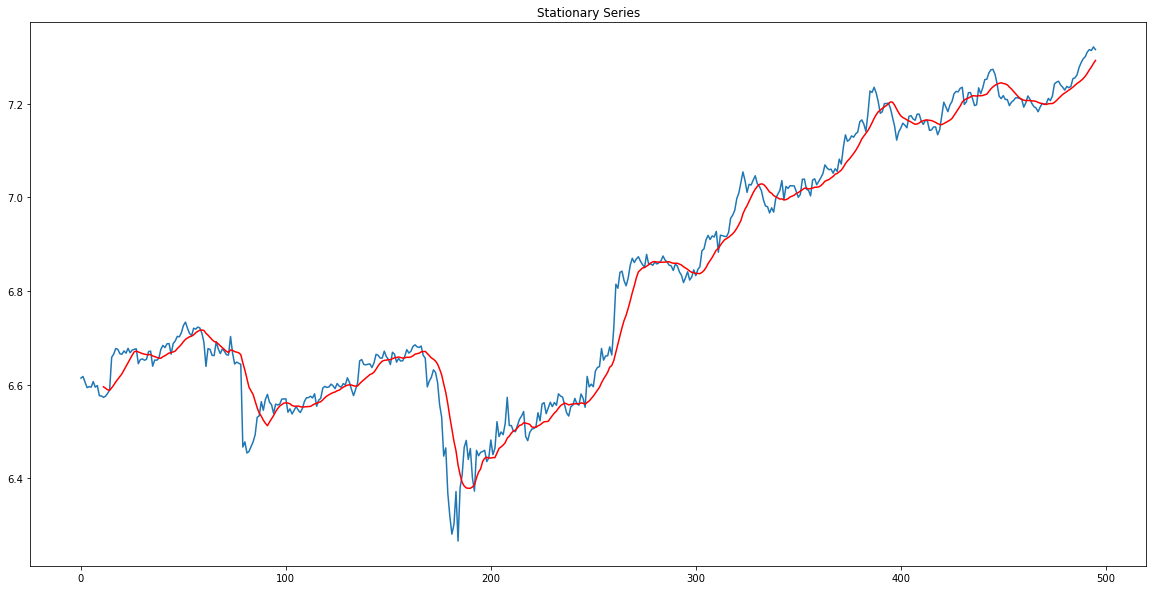

In [27]:
#The below transformation is required to make series stationary
movingAverage = df_logScale.rolling(window=12).mean()
movingSTD = df_logScale.rolling(window=12).std()
plt.plot(df_logScale)
plt.plot(movingAverage, color='red')
plt.title("Stationary Series")

In [28]:
datasetLogScaleMinusMovingAverage = df_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage

,Close
11,-0.022571
12,-0.016909
13,-0.007984
14,0.000681
15,0.065170
...,...
491,0.045339
492,0.043461
493,0.035079
494,0.035485


In [29]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Close'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

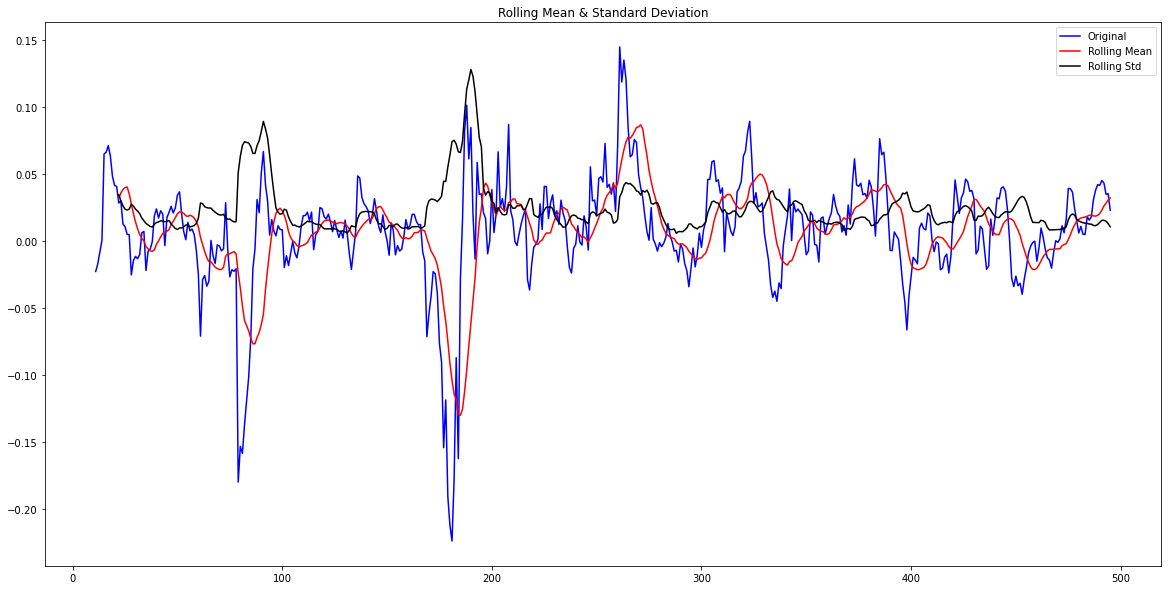

Results of Dickey Fuller Test:
Test Statistic                -6.295704e+00
p-value                        3.510302e-08
#Lags Used                     7.000000e+00
Number of Observations Used    4.750000e+02
Critical Value (1%)           -3.444192e+00
Critical Value (5%)           -2.867644e+00
Critical Value (10%)          -2.570021e+00
dtype: float64


In [30]:
test_stationarity(datasetLogScaleMinusMovingAverage)

In [31]:
datasetLogScaleMinusMovingAverage

,Close
11,-0.022571
12,-0.016909
13,-0.007984
14,0.000681
15,0.065170
...,...
491,0.045339
492,0.043461
493,0.035079
494,0.035485


# Exponential Decay Transformation

Text(0.5, 1.0, 'Exponential Decay Transformation')

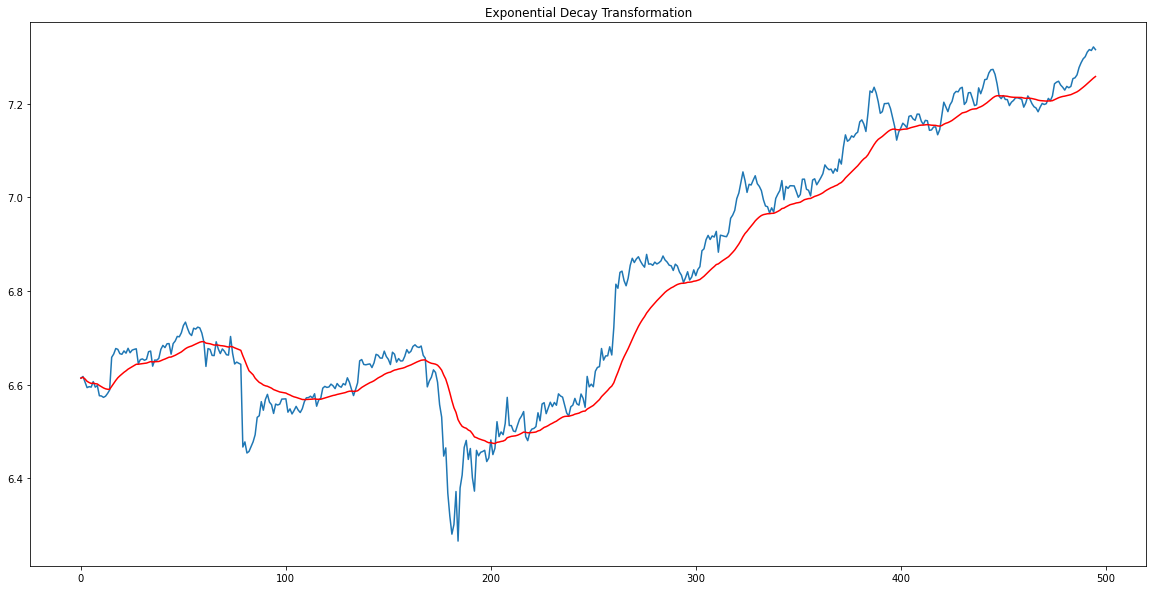

In [32]:
exponentialDecayWeightedAverage = df_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(df_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')
plt.title("Exponential Decay Transformation")

In [33]:
exponentialDecayWeightedAverage

,Close
0,6.614055
1,6.615846
2,6.612221
3,6.607208
4,6.604652
...,...
491,7.242693
492,7.246775
493,7.250515
494,7.254476


In [34]:
datasetLogScaleMinusExponentialMovingAverage = df_logScale - exponentialDecayWeightedAverage
# test_stationarity(datasetLogScaleMinusExponentialMovingAverage)

In [35]:
datasetLogScaleMinusExponentialMovingAverage

,Close
0,0.000000
1,0.001690
2,-0.006652
3,-0.013411
4,-0.008871
...,...
491,0.067389
492,0.068643
493,0.062905
494,0.066613


In [36]:
datasetLogScaleMinusExponentialMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Close
11,-0.022571
12,-0.016909
13,-0.007984
14,0.000681
15,0.065170
16,0.066393
17,0.071303
18,0.063742
19,0.048543
20,0.041712


In [37]:
datasetLogScaleMinusMovingAverage.describe()

,Close
count,483.000000
mean,0.008136
std,0.040896
min,-0.223755
25%,-0.007047
50%,0.009842
75%,0.028550
max,0.145020


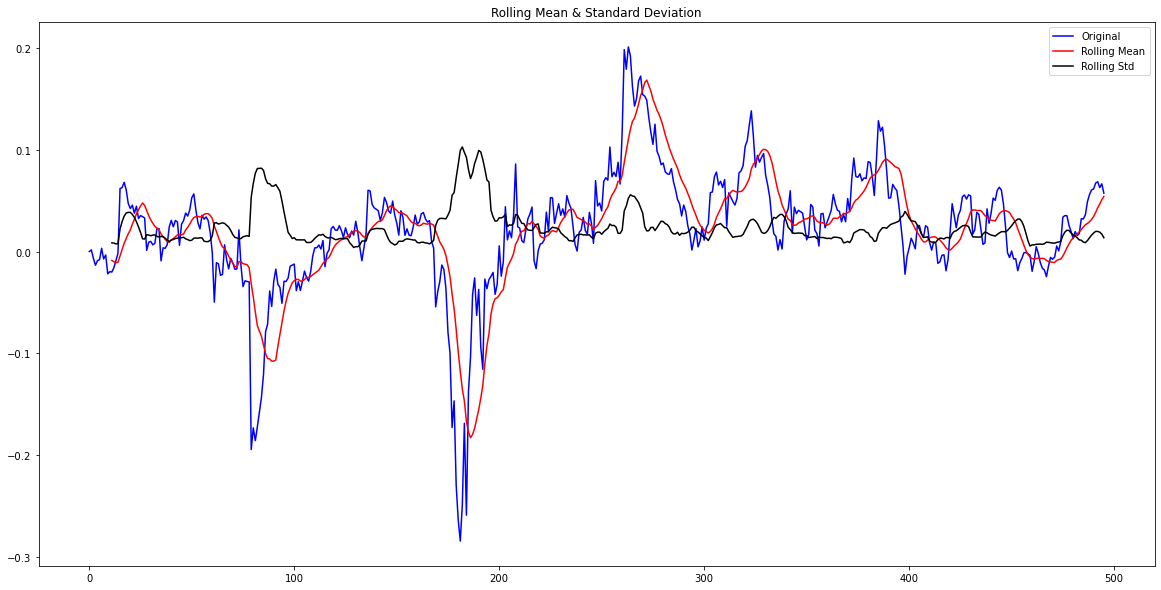

Results of Dickey Fuller Test:
Test Statistic                  -3.705430
p-value                          0.004037
#Lags Used                       7.000000
Number of Observations Used    486.000000
Critical Value (1%)             -3.443877
Critical Value (5%)             -2.867505
Critical Value (10%)            -2.569947
dtype: float64


In [38]:
test_stationarity(datasetLogScaleMinusExponentialMovingAverage)

# Time Shift Transformation 

Text(0.5, 1.0, 'TIme shift Transformation')

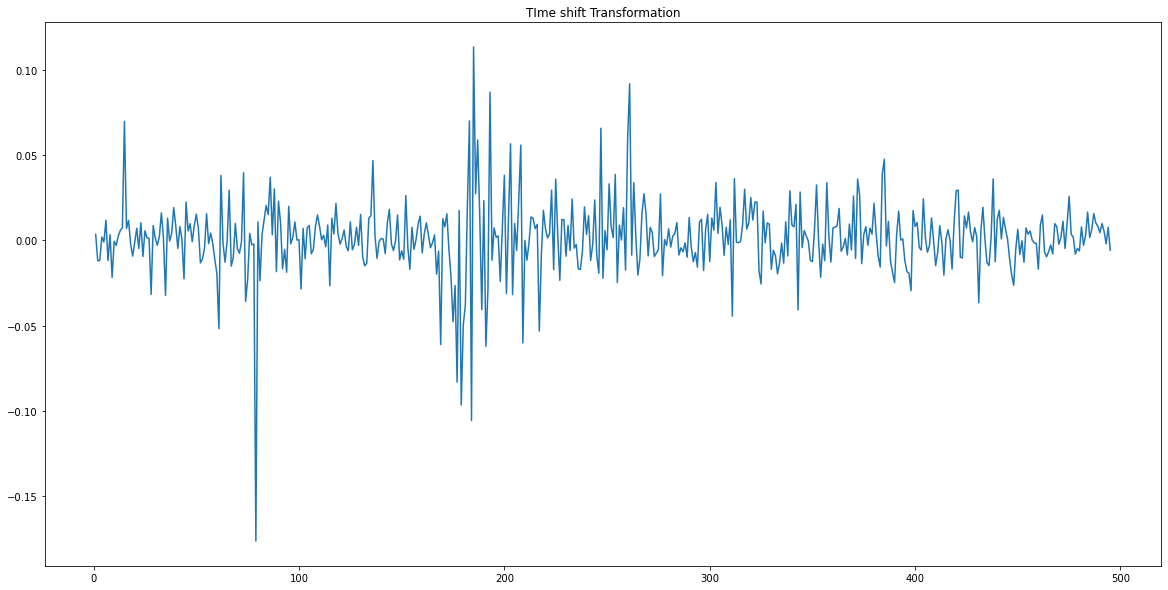

In [39]:
datasetLogDiffShifting = df_logScale - df_logScale.shift()
plt.plot(datasetLogDiffShifting)
plt.title("TIme shift Transformation")

In [40]:
datasetLogDiffShifting

,Close
0,NaN
1,0.003481
2,-0.011968
3,-0.011771
4,0.001983
...,...
491,0.009879
492,0.005336
493,-0.001998
494,0.007669


In [41]:
datasetLogDiffShifting.describe()

,Close
count,493.000000
mean,0.001422
std,0.022150
min,-0.176595
25%,-0.008020
50%,0.001420
75%,0.010250
max,0.113627


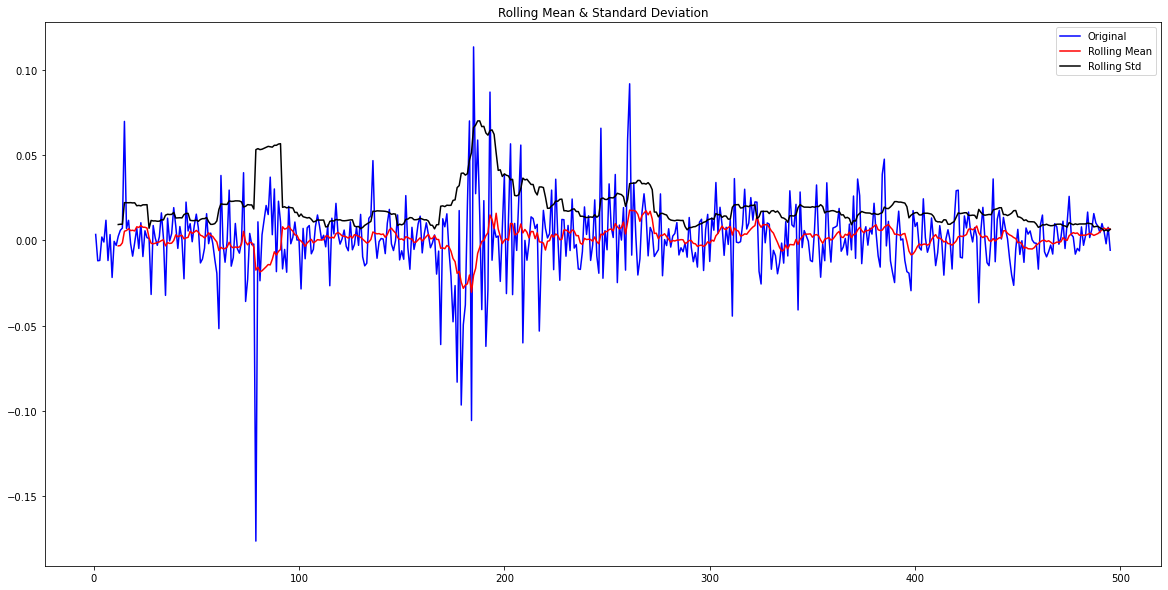

Results of Dickey Fuller Test:
Test Statistic                -8.242257e+00
p-value                        5.675555e-13
#Lags Used                     6.000000e+00
Number of Observations Used    4.860000e+02
Critical Value (1%)           -3.443877e+00
Critical Value (5%)           -2.867505e+00
Critical Value (10%)          -2.569947e+00
dtype: float64


In [42]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

In [43]:
df_logScale

,Close
0,6.614055
1,6.617537
2,6.605569
3,6.593798
4,6.595781
...,...
491,7.310082
492,7.315418
493,7.313420
494,7.321089


In [44]:
datasetLogDiffShifting

,Close
1,0.003481
2,-0.011968
3,-0.011771
4,0.001983
5,-0.000957
...,...
491,0.009879
492,0.005336
493,-0.001998
494,0.007669


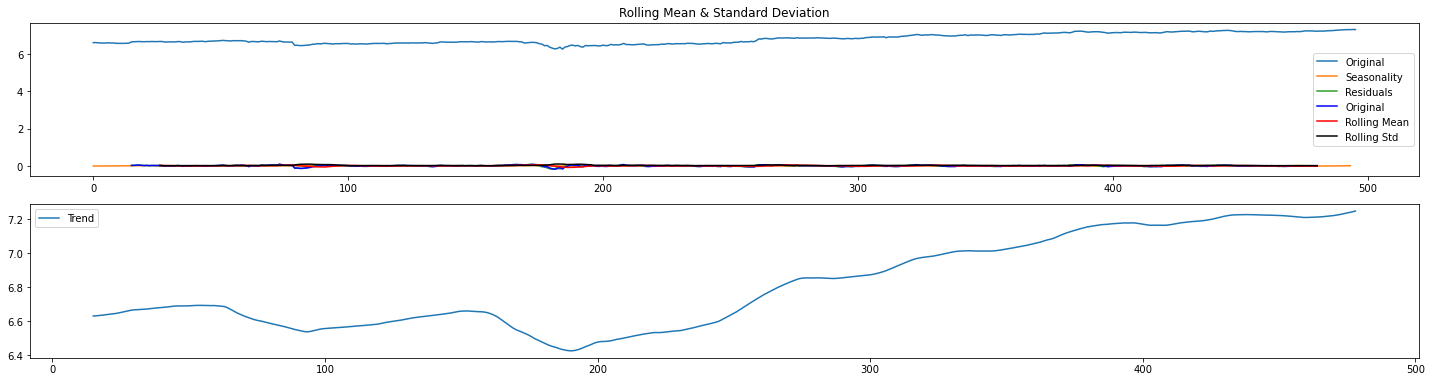

Results of Dickey Fuller Test:
Test Statistic                -7.875075e+00
p-value                        4.868510e-12
#Lags Used                     8.000000e+00
Number of Observations Used    4.550000e+02
Critical Value (1%)           -3.444804e+00
Critical Value (5%)           -2.867913e+00
Critical Value (10%)          -2.570165e+00
dtype: float64


In [45]:
decomposition =seasonal_decompose(np.asarray(df_logScale['Close']), freq = 30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

#there can be cases where an observation simply consisted of trend & seasonality. In that case, there won't be 
#any residual component & that would be a null or NaN. Hence, we also remove such cases.
decomposedLogData = residual
decomposedLogData1 = pd.DataFrame(decomposedLogData, columns=df_logScale.columns, index=df_logScale.index)
decomposedLogData1.dropna(inplace=True)
test_stationarity(decomposedLogData1)


In [46]:
# decomposedLogData

In [47]:
# decomposedLogData1 = pd.DataFrame(decomposedLogData, columns=df_logScale.columns, index=df_logScale.index)

In [48]:
# decomposedLogData1.dropna(inplace=True)
# test_stationarity(decomposedLogData1)


# Plotting ACF & PACF

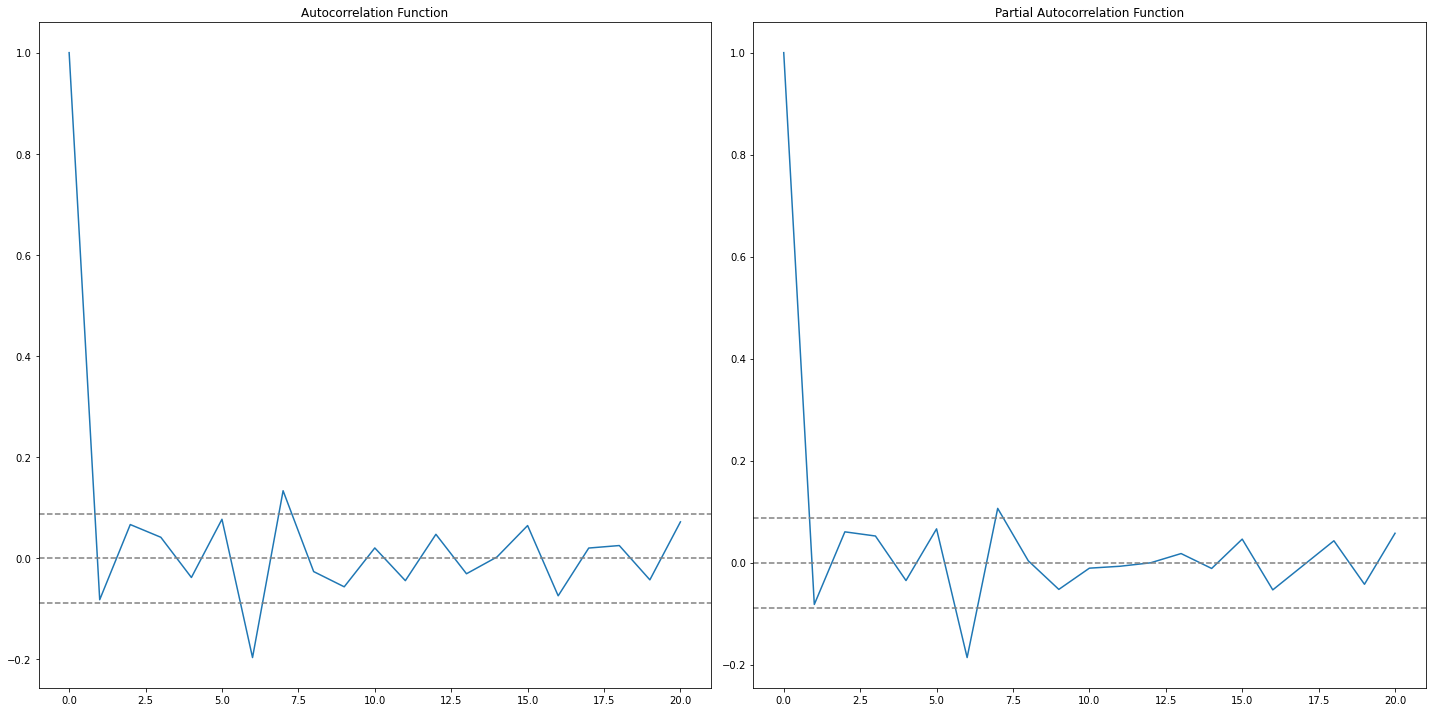

In [49]:
#ACF & PACF plots

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()            

#  Model Building

C:\Users\Pavan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Pavan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Plotting AR model


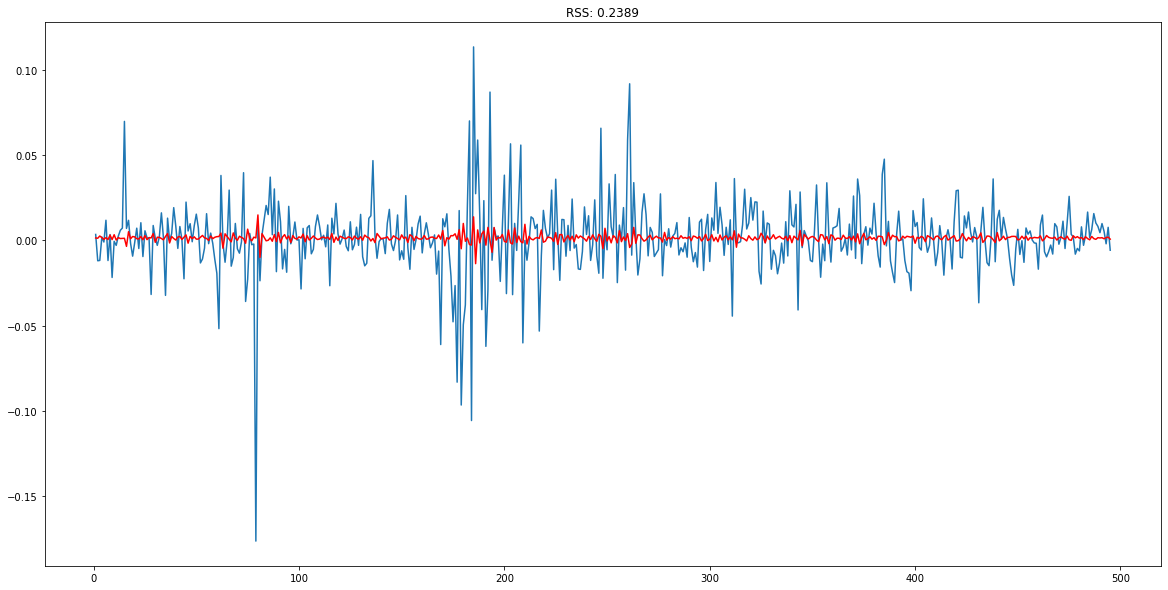

In [50]:
#AR Model
#making order=(2,1,0) gives RSS=1.5023
model = ARIMA(df_logScale, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - datasetLogDiffShifting['Close'])**2))
print('Plotting AR model')

C:\Users\Pavan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Pavan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Plotting MA model


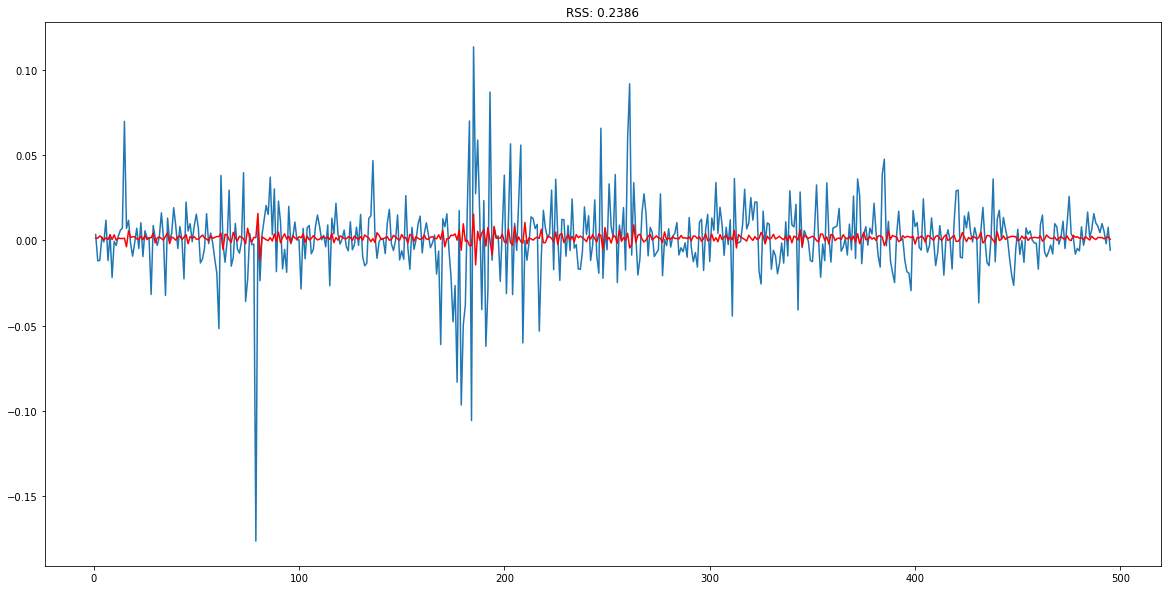

In [51]:
model = ARIMA(df_logScale, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - datasetLogDiffShifting['Close'])**2))
print('Plotting MA model')

C:\Users\Pavan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Pavan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Plotting ARIMA model


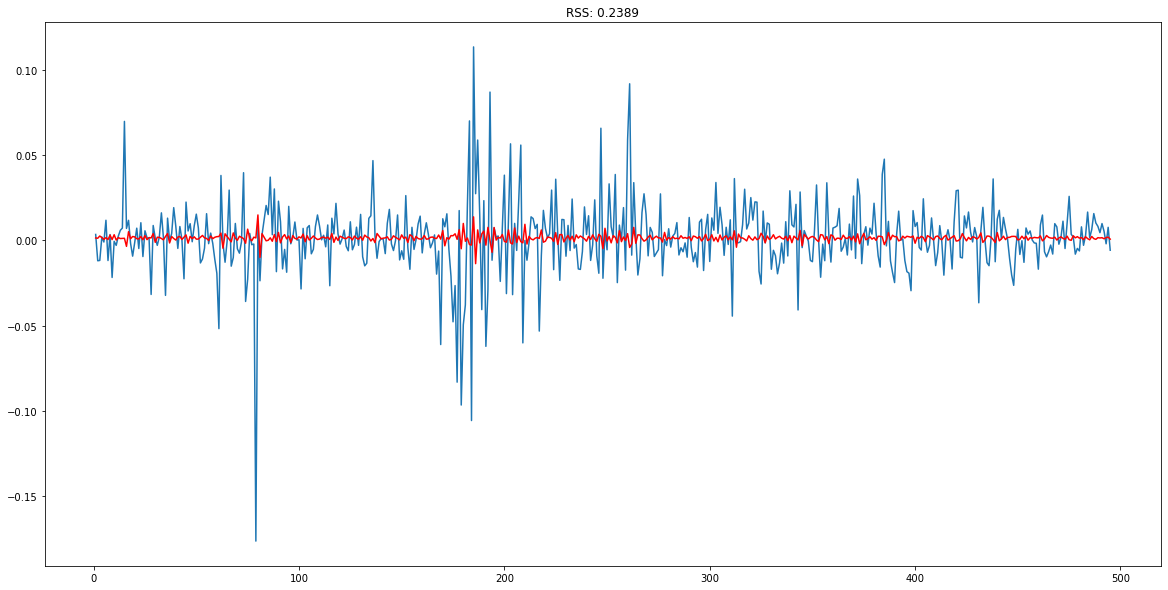

In [52]:
# AR+I+MA = ARIMA model
model = ARIMA(df_logScale, order=(2,1,0))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['Close'])**2))
print('Plotting ARIMA model')

#  Reverse transformations and Prediction

In [53]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff)

1      0.001422
2      0.001253
3      0.002578
4      0.001636
5      0.000587
         ...   
491    0.001591
492    0.000956
493    0.001627
494    0.001920
495    0.000735
Length: 493, dtype: float64


In [54]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

1      0.001422
2      0.002674
3      0.005253
4      0.006889
5      0.007476
         ...   
491    0.695174
492    0.696130
493    0.697757
494    0.699677
495    0.700412
Length: 493, dtype: float64


In [55]:
predictions_ARIMA_log = pd.Series(df_logScale['Close'].iloc[0], index=df_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log

0      6.614055
1      6.615477
2      6.616730
3      6.619308
4      6.620944
         ...   
491    7.309229
492    7.310185
493    7.311812
494    7.313732
495    7.314467
Length: 494, dtype: float64

Text(0.5, 1.0, 'Predictin vs Actual')

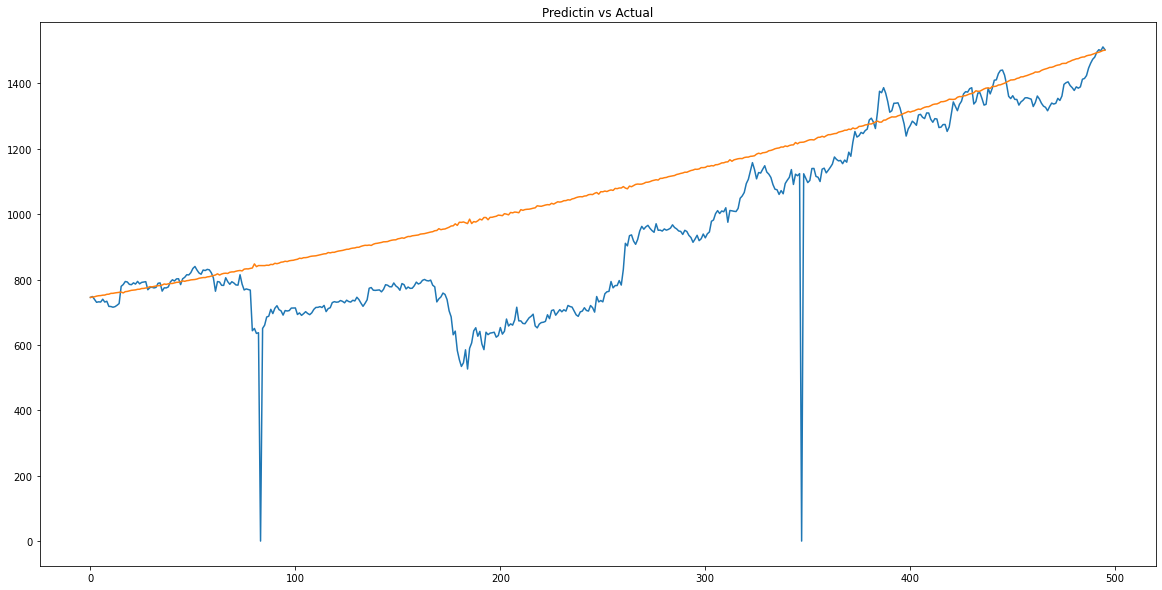

In [56]:
# Inverse of log is exp.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df1)
plt.plot(predictions_ARIMA)
plt.title("Predictin vs Actual")

In [57]:
predictions_ARIMA

0       745.500000
1       746.560673
2       747.496502
3       749.426163
4       750.653340
          ...     
491    1494.024343
492    1495.453521
493    1497.888918
494    1500.768105
495    1501.871190
Length: 494, dtype: float64

In [58]:
new_df = pd.DataFrame(df['Close'], columns=df1.columns, index=df1.index)

In [59]:
new_df

,Close
0,745.500000
1,748.099976
2,739.200012
3,730.549988
4,732.000000
...,...
491,1495.300049
492,1503.300049
493,1500.300049
494,1511.849976


In [60]:
new_df['Predicted'] = predictions_ARIMA

In [61]:
new_df['Date'] = df['Date']

In [62]:
final = new_df[["Date", "Close", "Predicted"]]

In [63]:
final.tail(20)

,Date,Close,Predicted
476,2021-05-27,1402.250000,1461.548542
477,2021-05-28,1405.050049,1465.530909
478,2021-05-31,1393.750000,1467.740464
479,2021-01-06,1387.199951,1470.956402
480,2021-02-06,1378.650024,1472.906846
481,2021-03-06,1389.650024,1475.325056
482,2021-04-06,1385.650024,1476.007156
483,2021-07-06,1389.650024,1479.176935
484,2021-08-06,1412.949951,1480.732160
485,2021-09-06,1415.300049,1481.230429


C:\Users\Pavan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\Pavan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\Pavan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


Text(0.5, 1.0, 'Forecasting')

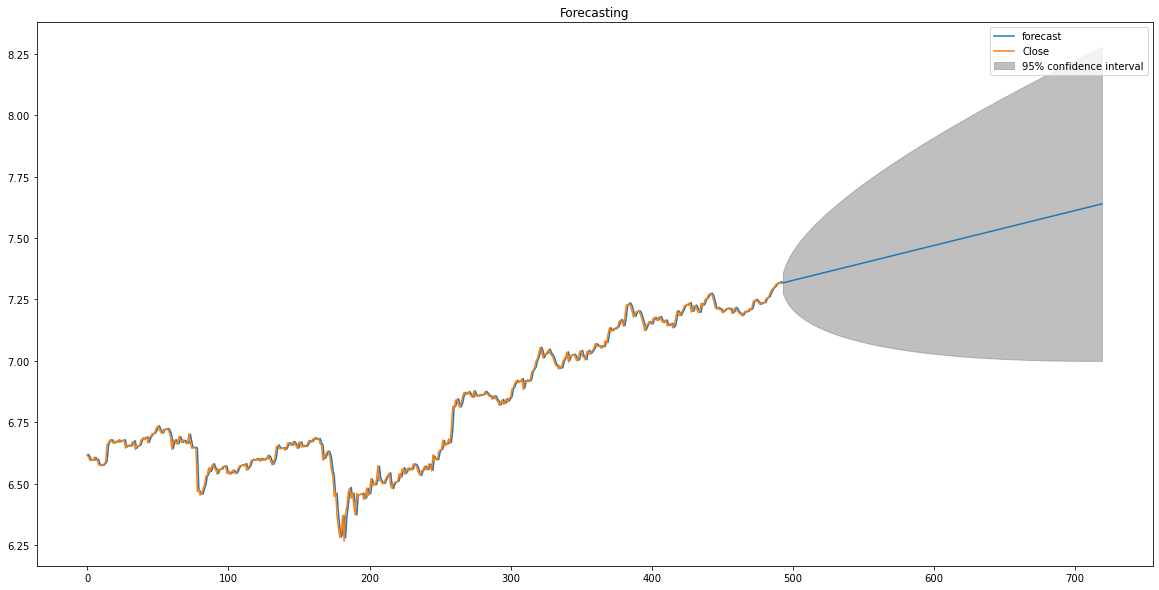

In [64]:
results_ARIMA.plot_predict(1,720) 
plt.title("Forecasting")